**Load the given dataset**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.cluster import contingency_matrix
from fuzzywuzzy import fuzz
from sklearn import datasets
from sklearn.cluster import KMeans
from fcmeans import FCM

In [53]:
iris = datasets.load_iris()

In [54]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

**Conduct the pre-processing steps, if required**

In [55]:
# In this case, we'll perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1].values)
df.iloc[:, :-1] = scaled_features

**Remove the target variable, if available in the dataset**

In [56]:
df.drop('Species', axis=1, inplace=True)

**Plot the datapoints using scatter plots**

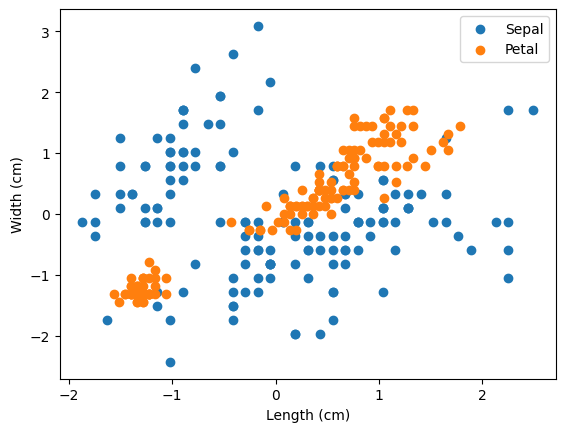

In [57]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], label='Sepal')
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], label='Petal')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.legend()
plt.show()


**Apply fuzzy C-means clustering approach and cluster the datapoints into N number of
clusters. Determine the optimal number of clusters**

In [58]:
fcm = FCM(n_clusters=5)
fcm.fit(df.values)
fcm_centers = fcm.centers
fcm_labels = pairwise_distances_argmin_min(df.values, fcm_centers)[0]
fcm_optimal_clusters = len(set(fcm_labels))

In [59]:
print("Cluster Centroids:")
print(fcm_centers)

Cluster Centroids:
[[-0.72793977  1.50596326 -1.27314511 -1.20838105]
 [-0.26423071 -1.1257136   0.17103879  0.06549763]
 [-1.27693949  0.23363842 -1.29961424 -1.28612239]
 [ 0.46178829 -0.37241187  0.61335432  0.55472939]
 [ 1.23106746  0.13071659  1.07949412  1.20215041]]


**6. Print and plot the cluster centroids and cluster labels**

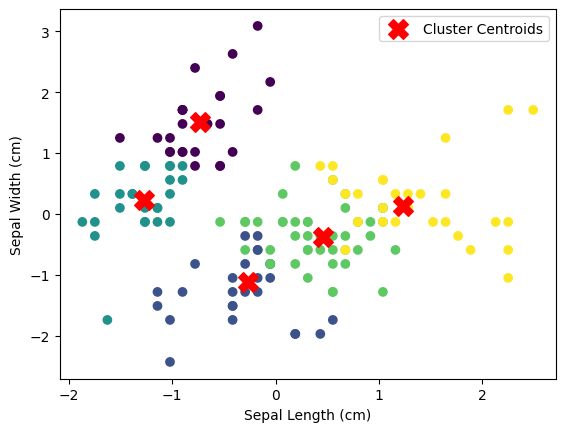

In [60]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=fcm_labels)
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker='X', color='red', s=200, label='Cluster Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

**7. Repeat the algorithm for 'n' number of clusters**

In [61]:
n_clusters = 3
fcm_n = FCM(n_clusters=n_clusters)
fcm_n.fit(df.values)
fcm_n_centers = fcm_n.centers
fcm_n_labels = pairwise_distances_argmin_min(df.values, fcm_n_centers)[0]

In [63]:
contingency_mat = contingency_matrix(fcm_n_labels, iris.target)

In [64]:
total_sum = contingency_mat.sum()
row_sums = contingency_mat.sum(axis=1)
col_sums = contingency_mat.sum(axis=0)

**8. Measure the performance using partition co-efficient and classification entropy metrics.**

In [65]:
partition_coefficient = (total_sum - np.sum(row_sums * row_sums)) / (total_sum - np.sum(row_sums * col_sums))
classification_entropy = np.sum(row_sums * np.log(row_sums / total_sum))

In [66]:
print("Partition Coefficient:", partition_coefficient)
print("Classification Entropy:", classification_entropy)

Partition Coefficient: 1.0010884353741496
Classification Entropy: -164.71182195321808


**9. Print and plot the cluster centroids and cluster labels for 'n' number of clusters**

Cluster Centroids:
[[-1.00478337  0.84648484 -1.28465359 -1.23864587]
 [-0.03836597 -0.81872284  0.32296952  0.23214988]
 [ 1.06924706  0.03742413  0.9701733   1.02978809]]


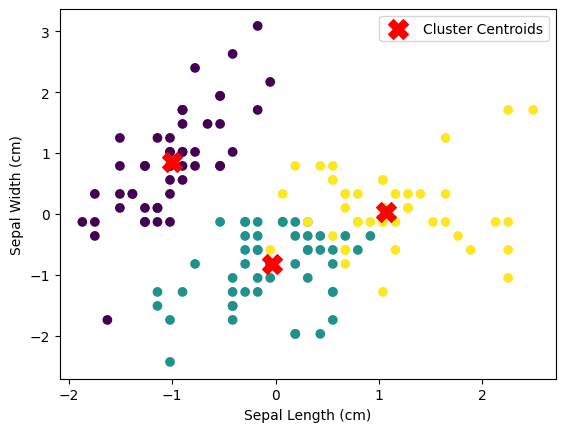

In [67]:
print("Cluster Centroids:")
print(fcm_n_centers)

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=fcm_n_labels)
plt.scatter(fcm_n_centers[:, 0], fcm_n_centers[:, 1], marker='X', color='red', s=200, label='Cluster Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()